## Задача. Обучите Neural Network от TensorFlow.

In [1]:
from google.colab import files
from tensorflow.keras import layers, models, utils
from IPython.display import display, Markdown
import tensorflow as tf
import tensorflow_datasets as tfds
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings as warn
import cv2

# для работы с графиками в интерактивном режиме
%matplotlib inline

# устанавливаем точность чисел с плавающей точкой
%precision %.4f

# отключаем предупреждения
warn.filterwarnings('ignore')

*Для этой задачи используем готовый датасет Fashion MNIST от TensorFlow*

In [2]:
# Загрузка датасета Fashion MNIST
(train_ds, test_ds), ds_info = tfds.load(
    'fashion_mnist',
    split=['train', 'test'],
    shuffle_files=True,
    as_supervised=True,
    with_info=True,
)

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

Generating splits...:   0%|          | 0/2 [00:00<?, ? splits/s]

Generating train examples...:   0%|          | 0/60000 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/fashion_mnist/3.0.1.incomplete9KPIZ7/fashion_mnist-train.tfrecord*...:   0…

Generating test examples...:   0%|          | 0/10000 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/fashion_mnist/3.0.1.incomplete9KPIZ7/fashion_mnist-test.tfrecord*...:   0%…

Dataset fashion_mnist downloaded and prepared to /root/tensorflow_datasets/fashion_mnist/3.0.1. Subsequent calls will reuse this data.


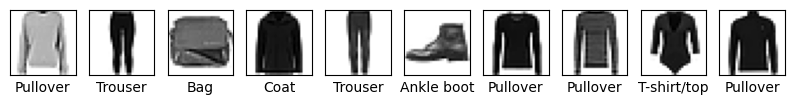

In [3]:
# Функция отображения изображений
def display_images(dataset, num_images=5):
    plt.figure(figsize=(10, 10))
    for i, (image, label) in enumerate(dataset.take(num_images)):
        plt.subplot(1, num_images, i+1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(image.numpy(), cmap=plt.cm.binary)
        plt.xlabel(ds_info.features['label'].int2str(label))
    plt.show()

# Количество изображений для отображения
num_images = 10

# Отображаем несколько изображений
display_images(train_ds, num_images)

In [4]:
# Функция нормализации
def normalize_img(image, label):
    return tf.cast(image, tf.float32) / 255.0, label

# Применение нормализации
train_ds = train_ds.map(normalize_img, num_parallel_calls=tf.data.experimental.AUTOTUNE).batch(32)
test_ds = test_ds.map(normalize_img, num_parallel_calls=tf.data.experimental.AUTOTUNE).batch(32)

In [5]:
# Создание модели
model = models.Sequential([
    # Сверточный слой, принимающий изображение размером 28x28 пикселей
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.25),
    # Второй сверточный слой
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.25),
    # Третий сверточный слой
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.25),
    # Переход от свёрточных слоёв к полносвязным слоям
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    # Выходной слой с 10 нейронами, соответствующими классам одежды
    layers.Dense(10, activation='softmax')
])

# Компиляция модели
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Обзор всех слоев
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 batch_normalization (Batch  (None, 26, 26, 32)        128       
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 13, 13, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 batch_normalization_1 (Bat  (None, 11, 11, 64)        2

In [6]:
# Обучение модели
history = model.fit(train_ds, batch_size=32, epochs=20, validation_data=test_ds)

Epoch 1/20
1875/1875 [==============================] - 88s 46ms/step - loss: 0.6926 - accuracy: 0.7517 - val_loss: 0.4342 - val_accuracy: 0.8375
Epoch 2/20
1875/1875 [==============================] - 79s 42ms/step - loss: 0.4758 - accuracy: 0.8290 - val_loss: 0.3783 - val_accuracy: 0.8564
Epoch 3/20
1875/1875 [==============================] - 85s 46ms/step - loss: 0.4263 - accuracy: 0.8460 - val_loss: 0.3540 - val_accuracy: 0.8693
Epoch 4/20
1875/1875 [==============================] - 78s 42ms/step - loss: 0.3984 - accuracy: 0.8557 - val_loss: 0.3424 - val_accuracy: 0.8717
Epoch 5/20
1875/1875 [==============================] - 80s 43ms/step - loss: 0.3836 - accuracy: 0.8599 - val_loss: 0.3506 - val_accuracy: 0.8683
Epoch 6/20
1875/1875 [==============================] - 79s 42ms/step - loss: 0.3657 - accuracy: 0.8679 - val_loss: 0.3286 - val_accuracy: 0.8763
Epoch 7/20
1875/1875 [==============================] - 78s 42ms/step - loss: 0.3547 - accuracy: 0.8714 - val_loss: 0.3544 -

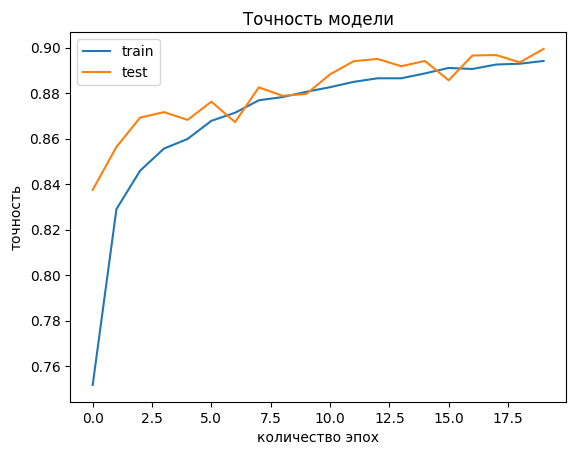

In [7]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Точность модели')
plt.ylabel('точность')
plt.xlabel('количество эпох')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

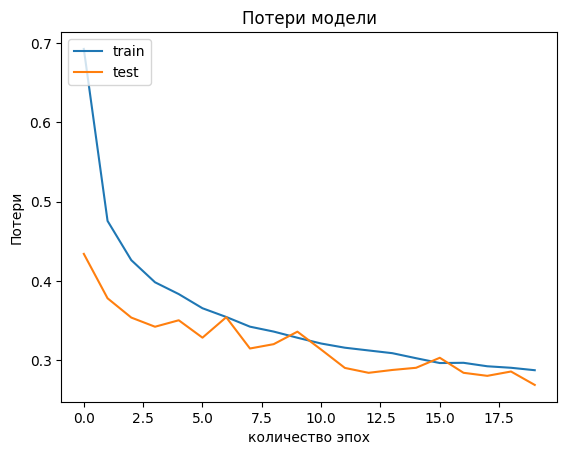

In [8]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Потери модели')
plt.ylabel('Потери')
plt.xlabel('количество эпох')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

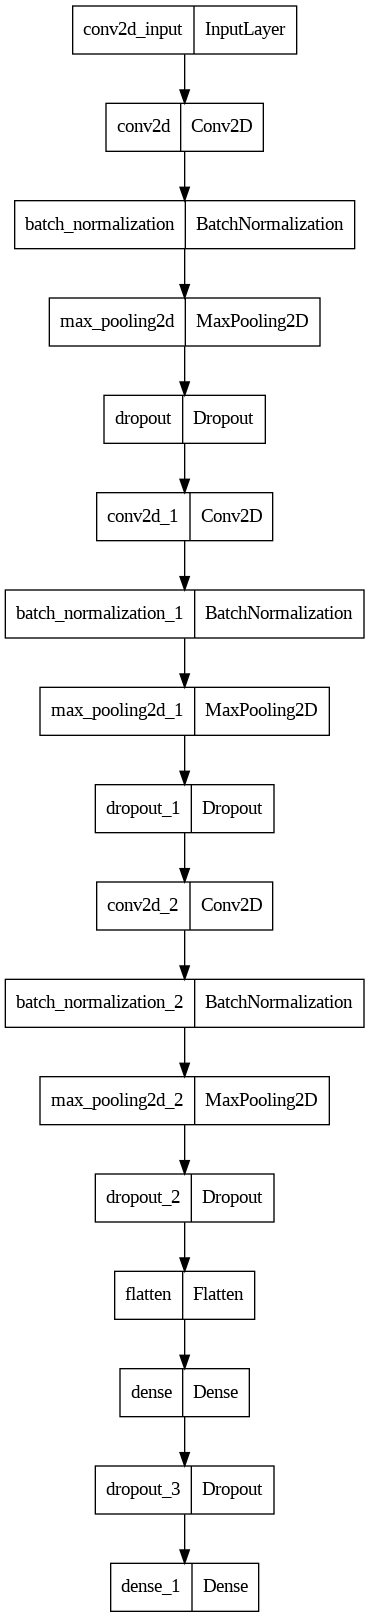

In [9]:
utils.plot_model(model)